1.INSTALL AND IMPORT DEPENDENCIES

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

                                                    2. KEYPOINTS USING HOLISTICS

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #COLOR CONVERSION
    image.flags.writeable=False
    results = model.process(image)
    image.flags.writeable=True
    image= cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # COLOR CONVERSION BACK
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image,results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame,results)

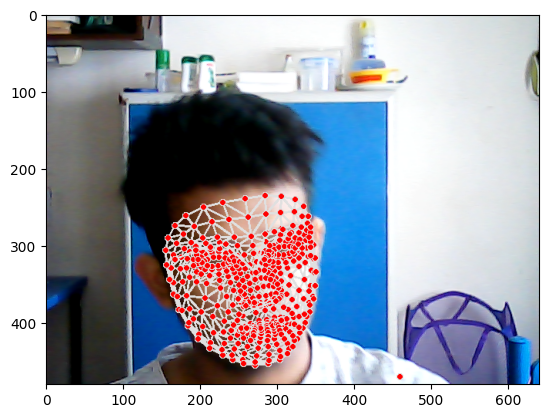

In [8]:
plt.imshow(cv2.cvtColor(frame ,cv2.COLOR_BGR2RGB)) 

                                                    3. EXTRACT KEYPOINT VALUES

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
results.pose_landmarks

landmark {
  x: 0.4265523
  y: 0.69829136
  z: -1.2611117
  visibility: 0.99952817
}
landmark {
  x: 0.4449255
  y: 0.5956043
  z: -1.2010424
  visibility: 0.99923885
}
landmark {
  x: 0.46385804
  y: 0.5878454
  z: -1.201316
  visibility: 0.99923563
}
landmark {
  x: 0.48009363
  y: 0.58155715
  z: -1.2018133
  visibility: 0.99936014
}
landmark {
  x: 0.3656036
  y: 0.6212275
  z: -1.2087848
  visibility: 0.9991295
}
landmark {
  x: 0.33428785
  y: 0.6294438
  z: -1.2077254
  visibility: 0.9989152
}
landmark {
  x: 0.30457965
  y: 0.6378622
  z: -1.2080271
  visibility: 0.9991134
}
landmark {
  x: 0.4950517
  y: 0.5941807
  z: -0.660967
  visibility: 0.99962497
}
landmark {
  x: 0.26227492
  y: 0.6632095
  z: -0.6674973
  visibility: 0.99937075
}
landmark {
  x: 0.46596533
  y: 0.7756301
  z: -1.0465934
  visibility: 0.99953717
}
landmark {
  x: 0.3911034
  y: 0.8118966
  z: -1.049077
  visibility: 0.99924994
}
landmark {
  x: 0.71763235
  y: 0.9810773
  z: -0.27781928
  visibility: 0

In [11]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [12]:
len(extract_keypoints(results))  # 468*3(face) + 33*4(pose) + 21*3(lh) + 21*3(rh) 

1662

                                                4. SETUP FOLDERS FOR COLLECTION

In [36]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [37]:
#we are collecting 30 videos per action and per video is having 30 frames of data and 1662 landmarks.
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH , action , str(sequence)))
        except:
            pass

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #New Loop
    #Loop through actions
    for action in actions:
        #Loop through sequences aka Videos
        for sequence in range (no_sequences):
            #Loop through Video Length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                #Draw landmarks
                draw_styled_landmarks(image,results)

                #NEW LOOP (Apply wait logic)
                if frame_num== 0:
                    cv2.putText(image, 'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,225,0),1,cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} Video NUmber{}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,225),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} Video NUmber{}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,225),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                #NEW EXPORT KEYPOINTS
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH , action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

                                        6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map={label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [21]:
sequences, labels = [], []   # representing X and Y respectively
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join('MP_Data', action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape    # have 90 videos 30 frames each 1662 points

(90, 30, 1662)

In [98]:
# SAVING AS VARIABLE X AND Y

In [23]:
x=np.array(sequences)

In [24]:
x

array([[[ 0.64618671,  0.57767808, -1.32913828, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.62914163,  0.56897658, -1.00795758, ...,  0.45653164,
          0.3085936 , -0.04903677],
        [ 0.61053401,  0.55790305, -1.16351604, ...,  0.44977874,
          0.31861216, -0.05150126],
        ...,
        [ 0.6294027 ,  0.54718918, -1.43948913, ...,  0.47319141,
          0.32710797, -0.04423949],
        [ 0.62904549,  0.54607594, -1.43867385, ...,  0.47227079,
          0.32661116, -0.0447492 ],
        [ 0.61757827,  0.54606783, -1.43424594, ...,  0.43808553,
          0.24224947, -0.04820096]],

       [[ 0.61212313,  0.54581094, -1.38370383, ...,  0.36736605,
          0.20495042, -0.03691493],
        [ 0.61238569,  0.54500026, -1.36481643, ...,  0.44424   ,
          0.303913  , -0.04664849],
        [ 0.612607  ,  0.54014224, -1.33748674, ...,  0.45105678,
          0.28985426, -0.03834796],
        ...,
        [ 0.63993442,  0.53034335, -1.69255924, ...,  

In [25]:
y= to_categorical(labels).astype(int)

In [26]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.05) #it means it will be 5 of  our data

In [28]:
x_train.shape

(85, 30, 1662)

                                        7. Build and Train LSTM Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [51]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [52]:
model=Sequential(
    [
        LSTM(64,return_sequences=True , activation='relu',input_shape=(30,1662)),
        LSTM(128,return_sequences=True , activation='relu'),
        LSTM(64,return_sequences=False , activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(actions.shape[0], activation='softmax')
    ]
)

In [53]:
res = [.7, 0.2, 0.1]

In [54]:
actions[np.argmax(res)]

'hello'

In [55]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [56]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 121ms/step - loss: 2.9673 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 112ms/step - loss: 4.9282 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 107ms/step - loss: 7.8405 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.6890 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.4222 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.7228 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 139ms/step - loss: 2.4212 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.2146 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.6034 - categorical_accuracy:

KeyboardInterrupt: 

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

                                                8.MAKE PREDICTIONS

In [35]:
from tensorflow.keras.models import load_model
file_name='action.h5'
loaded_model=load_model(file_name)

In [43]:
res=loaded_model.predict(x_test)

1/1 [==============================] - 0s 31ms/step


In [47]:
actions[np.argmax(res[1])]

IndexError: index 89 is out of bounds for axis 0 with size 3

In [45]:
y_test

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [46]:
actions[np.argmax(y_test[0])]

'hello'

                                                        9. SAVE WEIGHTS

In [49]:
model.save('action.h5')

                                        10. EVOLUTION USING CONFUSION MATRIX AND ACCURACY 

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 61ms/step


In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [67]:
accuracy_score(ytrue,yhat)

1.0

                                                        11. TEST IN REAL TIME DATA

In [30]:
from tensorflow.keras.models import load_model
file_name='action.h5'
loaded_model=load_model(file_name)

In [38]:
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [33]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [34]:
#NEW DETECTION VARIABLES\
sequence=[]
sentence=[]
threshold=0.9

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image,results)

        #MAKE PREDICTION
        keypoints= extract_keypoints(results)
        sequence.append(keypoints)
        sequence= sequence[-30:]

        if len(sequence)==30:
            res=loaded_model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])


         #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: index 80 is out of bounds for axis 0 with size 3

In [66]:
np.expand_dims(x_test[0],axis=0).shape

(1, 30, 1662)

In [67]:
model.predict(np.expand_dims(x_test[0],axis=0))

1/1 [==============================] - 0s 43ms/step


array([[7.2260707e-04, 9.9697101e-01, 2.3064138e-03]], dtype=float32)

In [20]:
cap.release()
cv2.destroyAllWindows()